In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

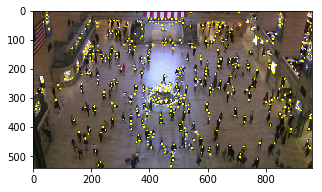

In [2]:
# Using the function Shi-Tomasi corners (cv2.goodFeaturesToTrack).
# To find good tracking points.

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 500,
                       qualityLevel = 0.001,
                       minDistance = 10,
                       blockSize = 15 )


cap = cv2.VideoCapture('P2_grandCentral.mp4')

for i in range(10):
    ret, img = cap.read()

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)       
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pts0 = cv2.goodFeaturesToTrack(img_gray, mask = None, **feature_params)
pts0 = pts0.squeeze()

for x,y in pts0:
    img_rgb = cv2.circle(img_rgb,(x,y),3,(255,255,0),-1)

plt.figure(figsize=(5,5))    
plt.imshow(img_rgb)
plt.show()


In [3]:
# Tracking people.
# using optical flow (cv2.calcOpticalFlowPyrLK.) track these point from frame-to-frame.

cap = cv2.VideoCapture('P2_grandCentral.mp4')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 500,
                       qualityLevel = 0.001,
                       minDistance = 10,
                       blockSize = 5 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 0,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))


# Take first frame and find corners in it
ret, F0 = cap.read()
F0 = cv2.resize(F0,(640,360))

F0_gray = cv2.cvtColor(F0, cv2.COLOR_BGR2GRAY)
pts0 = cv2.goodFeaturesToTrack(F0_gray, mask = None, **feature_params)
pts0 = pts0.squeeze() # (n,1,2) -> (n,2)

# Create a mask image for drawing purposes
canvas = np.zeros_like(F0)

while(1):
    ret,F1 = cap.read()
    
    if ret==True:
    
        F1 = cv2.resize(F1,(640,360))
        F1_gray = cv2.cvtColor(F1, cv2.COLOR_BGR2GRAY)

        # calculate optical flow
        pts1, status, err = cv2.calcOpticalFlowPyrLK(F0_gray, F1_gray, pts0, None, **lk_params)
        
        # Select good points
        status = status.flatten() # (n,1) -> (n,)
        pts1 = pts1[status==1]
        pts0 = pts0[status==1]
        
        for (p0,p1) in zip(pts0,pts1):
            x0,y0 = p0
            x1,y1 = p1
            canvas = cv2.line(canvas, (x0,y0),(x1,y1), (0,0,255), 2) 
            F1 = cv2.circle(F1,(x1,y1),3,(0,0,255),-1)
            
        # Now update the previous frame and previous points
        F0_gray = F1_gray
        pts0 = pts1
        
        # update corners in the frame 
        if(len(pts0) < 500):
            pts0 = cv2.goodFeaturesToTrack(F0_gray, mask = None, **feature_params)
            pts0 = pts0.squeeze()
    else:
        break
    canvas = np.uint8(canvas*0.9) # fade out canvas   
    img = cv2.add(F1, canvas)
    cv2.imshow('frame',img)
    k = cv2.waitKey(1) & 0xff
    if k == 27:
        break


cap.release() 
cv2.destroyAllWindows()
cv2.waitKey(1);

In [4]:
# Heat map
# We will find the heat map of people who move in the video

cap = cv2.VideoCapture('P2_grandCentral.mp4')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 500,
                       qualityLevel = 0.001,
                       minDistance = 10,
                       blockSize = 5 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 0,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.3))


# Take first frame and find corners in it
ret, F0 = cap.read()
F0 = cv2.resize(F0,(640,360))

F0_gray = cv2.cvtColor(F0, cv2.COLOR_BGR2GRAY)
pts0 = cv2.goodFeaturesToTrack(F0_gray, mask = None, **feature_params)
pts0 = pts0.squeeze() # (n,1,2) -> (n,2)

# Create a mask image for drawing purposes
canvas = np.zeros_like(F0)


while(1):
    ret,F1 = cap.read()
   
    if (ret == True):
    
        F1 = cv2.resize(F1,(640,360))
        F1_gray = cv2.cvtColor(F1, cv2.COLOR_BGR2GRAY)

        # calculate optical flow
        pts1, status, err = cv2.calcOpticalFlowPyrLK(F0_gray, F1_gray, pts0, None, **lk_params)
        
        # Select good points
        status = status.flatten() # (n,1) -> (n,)
        pts1 = pts1[status==1]
        pts0 = pts0[status==1]
        for (p0,p1) in zip(pts0,pts1):
            x0,y0 = p0
            x1,y1 = p1
            canvas = cv2.line(canvas, (x0,y0),(x1,y1), (255,255,255), 1) 
        
        canvas1 = canvas.copy()
        canvas1 = cv2.GaussianBlur(canvas1, (0,0), 1)
       
        im_color = cv2.applyColorMap(canvas1, cv2.COLORMAP_HOT)
        
        # Now update the previous frame and previous points
        F0_gray = F1_gray
        pts0 = pts1
        # update corners in the frame
        if(len(pts0) < 450):
            pts0 = cv2.goodFeaturesToTrack(F0_gray, mask = None, **feature_params)
            pts0 = pts0.squeeze()
    else:
        break
             

    img = cv2.add(F1, im_color)
    cv2.imshow('frame',img)
    k = cv2.waitKey(1) & 0xff
    if k == 27:
        break


cap.release() 
cv2.destroyAllWindows()
cv2.waitKey(1);

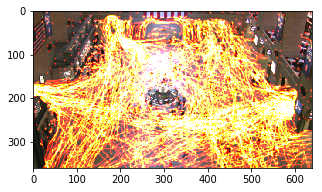

In [5]:
plt.figure(figsize=(5,5)) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img,cmap='hsv')
plt.show()


(540, 960, 3)


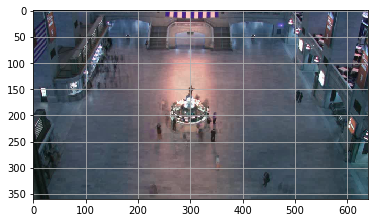

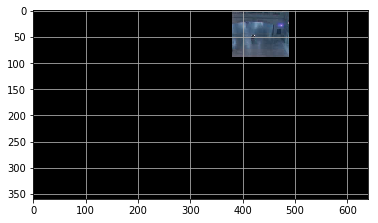

In [6]:

cap = cv2.VideoCapture('P2_grandCentral.mp4')
ret, F0 = cap.read()
print(F0.shape)
F0 = cv2.resize(F0,(640,360))
A = np.zeros_like(F0)

plt.imshow(F0)
plt.grid()
plt.show()

 
# A[0:100,95:225,:] = np.int8(F0[0:100,95:225,:])   
# A[0:90,220:380,:] = np.int8(F0[0:90,220:380,:])
A[0:90,380:490,:] = np.int8( F0[0:90,380:490,:])


# A[100:250,0:100,:] = np.int8(F0[100:250,0:100,:])
# A[300:960,0:960,:] = np.int8(F0[300:960,0:960,:])

# A[150:250,500:960,:] = np.int8(F0[150:250,500:960,:])
# A[50:150,490:800,:] = np.int8(F0[50:150,490:800,:])
# A[10:90,460:800,:] = np.int8(F0[10:90,460:800,:])

plt.imshow(A)
plt.grid()
plt.show()


In [ ]:
cap = cv2.VideoCapture('P2_grandCentral.mp4')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 200,
                       qualityLevel = 0.001,
                       minDistance = 40,
                       blockSize = 5 )

feature_params_2 = dict( maxCorners = 5,
                       qualityLevel = 0.001,
                       minDistance = 20,
                       blockSize = 5 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 0,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 5, 0.03))



# Take first frame and find corners in it
ret, old_frame = cap.read()
old_frame = cv2.resize(old_frame,(640,360))

old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

A = np.zeros_like(old_frame)
A[20:90,380:470,:] = np.int8( old_frame[20:90,380:470,:])
A = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)

B = np.zeros_like(old_frame)
B[300:960,100:400,:] = np.int8( old_frame[300:960,100:400,:])
B = cv2.cvtColor(B, cv2.COLOR_BGR2GRAY)

C = np.zeros_like(old_frame)
C[300:960,600:960,:] = np.int8( old_frame[300:960,600:960,:])
C = cv2.cvtColor(C, cv2.COLOR_BGR2GRAY)

p0 = cv2.goodFeaturesToTrack(A, mask = None, **feature_params)
p2 = cv2.goodFeaturesToTrack(B, mask = None, **feature_params)
p4 = cv2.goodFeaturesToTrack(C, mask = None, **feature_params)

p0 = p0.squeeze()
p2 = p2.squeeze()
p4 = p4.squeeze()

# Create a mask image for drawing purposes
canvas = np.zeros_like(old_frame)

i=0
while(1):
    ret,frame = cap.read()
    i+=1
    if(ret):
        frame = cv2.resize(frame,(640,360))
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # calculate optical flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
        p3, st2, err2 = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p2, None, **lk_params)
        p5, st3, err3 = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p4, None, **lk_params)

        st = st.flatten()
        st2 = st2.flatten()
        st3 = st3.flatten()

        # Select good points
        good_new = p1[st==1]
        good_old = p0[st==1]
        good_new2 = p3[st2==1]
        good_old2 = p2[st2==1]
        good_new4 = p5[st3==1]
        good_old4 = p4[st3==1]
        # draw the tracks
        for new,old in zip(good_new,good_old):
            a,b = new.ravel()
            c,d = old.ravel()
            canvas = cv2.line(canvas, (a,b),(c,d), (255,0,0), 1)
            frame = cv2.circle(frame,(a,b),2,(255,0,0),-1)

        for new,old in zip(good_new2,good_old2):
            a,b = new.ravel()
            c,d = old.ravel()
            canvas = cv2.line(canvas, (a,b),(c,d), (0,255,0), 1)
            frame = cv2.circle(frame,(a,b),2,(0,255,0),-1)  
        
        for new,old in zip(good_new4,good_old4):
            a,b = new.ravel()
            c,d = old.ravel()
            canvas = cv2.line(canvas, (a,b),(c,d), (0,0,255), 1)
            frame = cv2.circle(frame,(a,b),2,(0,0,255),-1)  

        canvas = np.uint8(canvas*0.9)
        img = cv2.add(frame,canvas)
        cv2.imshow('frame',img)
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
        # Now update the previous frame and previous points
        old_gray = frame_gray.copy()
        p0 = good_new
        p2 = good_new2
        p4 = good_new4
        
       # update corners in the frame
        if(i%10==0):
            p5 = cv2.goodFeaturesToTrack(A, mask = None, **feature_params_2)
            p5 = p5.squeeze()
            p0 = np.concatenate((p0,p5), axis=0)
            p6 = cv2.goodFeaturesToTrack(B, mask = None, **feature_params_2)
            p6 = p6.squeeze()
            p2 = np.concatenate((p2,p6), axis=0)
            p7 = cv2.goodFeaturesToTrack(C, mask = None, **feature_params_2)
            p7 = p7.squeeze()
            p4 = np.concatenate((p4,p7), axis=0)
            
            
    else:
        break


cap.release() 
cv2.destroyAllWindows()
cv2.waitKey(1);

# Final result


In [ ]:
# Connection of using heat map and tracking people

cap = cv2.VideoCapture('P2_grandCentral.mp4')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 200,
                       qualityLevel = 0.001,
                       minDistance = 40,
                       blockSize = 5 )

feature_params_2 = dict( maxCorners = 5,
                       qualityLevel = 0.001,
                       minDistance = 20,
                       blockSize = 5 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 0,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 5, 0.03))



# Take first frame and find corners in it
ret, old_frame = cap.read()
old_frame = cv2.resize(old_frame,(640,360))

old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

A = np.zeros_like(old_frame)
A[20:90,380:470,:] = np.int8( old_frame[20:90,380:470,:])
A = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)


p0 = cv2.goodFeaturesToTrack(A, mask = None, **feature_params)
p0 = p0.squeeze()

# Create a mask image for drawing purposes
canvas = np.zeros_like(old_frame)

i=0
while(1):
    ret,frame = cap.read()
    i+=1
    if(ret):
        frame = cv2.resize(frame,(640,360))
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # calculate optical flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
        st = st.flatten()

        # Select good points
        good_new = p1[st==1]
        good_old = p0[st==1]
        # draw the tracks
        for new,old in zip(good_new,good_old):
            a,b = new.ravel()
            c,d = old.ravel()
            canvas = cv2.line(canvas, (a,b),(c,d), (255,255,255), 1)
            frame = cv2.circle(frame,(a,b),2,(255,0,0),-1)

        canvas1 = canvas.copy()
        canvas1 = cv2.GaussianBlur(canvas1, (0,0), 1)
       
        canvas1_color = cv2.applyColorMap(canvas1, cv2.COLORMAP_HOT)


        img = cv2.add(frame,canvas1_color)
        cv2.imshow('frame',img)

        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
        # Now update the previous frame and previous points
        old_gray = frame_gray.copy()
        p0 = good_new

        
       
        if(i%10==0):
            p5 = cv2.goodFeaturesToTrack(A, mask = None, **feature_params_2)
            p5 = p5.squeeze()
            p0 = np.concatenate((p0,p5), axis=0)
            
    else:
        break

cap.release() 
cv2.destroyAllWindows()
cv2.waitKey(1);

In [ ]:
plt.figure(figsize=(5,5)) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img,cmap='hsv')
plt.show()


# Create new video

In [ ]:



cap = cv2.VideoCapture('P2_grandCentral.mp4')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 200,
                       qualityLevel = 0.001,
                       minDistance = 40,
                       blockSize = 5 )

feature_params_2 = dict( maxCorners = 5,
                       qualityLevel = 0.001,
                       minDistance = 20,
                       blockSize = 5 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 0,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 5, 0.03))


ret, old_frame = cap.read()
old_frame = cv2.resize(old_frame,(640,360))

fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
out = cv2.VideoWriter('grandCentral_out.mp4',fourcc, 20.0, (640,360))


old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

A = np.zeros_like(old_frame)
A[20:90,380:470,:] = np.int8( old_frame[20:90,380:470,:])
A = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)

# Take first frame and find corners in it
p0 = cv2.goodFeaturesToTrack(A, mask = None, **feature_params)
p0 = p0.squeeze()

# Create a mask image for drawing purposes
canvas = np.zeros_like(old_frame)

i=0
while(1):
    ret,frame = cap.read()
    i+=1
    if(ret):
        frame = cv2.resize(frame,(640,360))
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # calculate optical flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
        st = st.flatten()

        # Select good points
        good_new = p1[st==1]
        good_old = p0[st==1]
        # draw the tracks
        for new,old in zip(good_new,good_old):
            a,b = new.ravel()
            c,d = old.ravel()
            canvas = cv2.line(canvas, (a,b),(c,d), (255,255,255), 1)
            frame = cv2.circle(frame,(a,b),2,(255,0,0),-1)

        canvas1 = canvas.copy()
        canvas1 = cv2.GaussianBlur(canvas1, (0,0), 1)
       
        canvas1_color = cv2.applyColorMap(canvas1, cv2.COLORMAP_HOT)


        img = cv2.add(frame,canvas1_color)
        cv2.imshow('frame',img)
        out.write(img)

        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
        # Now update the previous frame and previous points
        old_gray = frame_gray.copy()
        p0 = good_new

        if(i%10==0):
            p5 = cv2.goodFeaturesToTrack(A, mask = None, **feature_params_2)
            p5 = p5.squeeze()
            p0 = np.concatenate((p0,p5), axis=0)
            
    else:
        break

cap.release() # release input video
out.release() # release output video 
cv2.destroyAllWindows() # delete output window
cv2.waitKey(1);